In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_title = "/content/drive/MyDrive/play/title.txt"
path_publisher = "/content/drive/MyDrive/play/publisher.txt"
path_desc = "/content/drive/MyDrive/play/app_desc.txt"
path_tag = "/content/drive/MyDrive/play/app_tag.txt"
path_class = "/content/drive/MyDrive/play/content_class.txt"
path_ratings = "/content/drive/MyDrive/play/ratings.txt"
path_agg_ratings = "/content/drive/MyDrive/play/agg_r.txt"
path_installs = "/content/drive/MyDrive/play/installs.txt"
path_nodes = "/content/drive/MyDrive/play/uniqueNodes.txt"
path_edges = "/content/drive/MyDrive/play/newEdge.txt"

In [ ]:
def listOfTuples(l1, l2):
    return list(map(lambda x, y:(x,y), l1, l2))

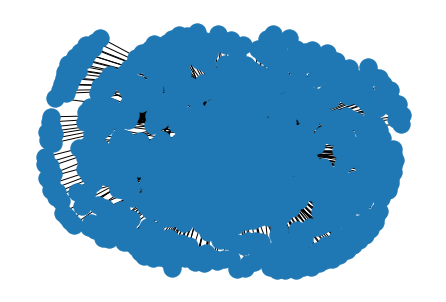

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


G = nx.DiGraph()

nodes = pd.read_csv((path_nodes), sep="," , names=['nodeid','url'])
G.add_nodes_from(nodes['nodeid'])

edges_df = pd.read_csv((path_edges), sep="," , names=['source','target'])
edges = listOfTuples(edges_df['target'], edges_df['source'])
G.add_edges_from(edges)

nx.draw(G)
plt.show()

In [ ]:
node_neighbors = [(n, list(G.neighbors(n))) for n in G.nodes()]
popular_nodes = sorted(node_neighbors, key = lambda x: len(x[1]), reverse = True)[:10]

popular_nodes

[(25,
  [219,
   699,
   66,
   378,
   12,
   214,
   422,
   549,
   26,
   608,
   506,
   273,
   177,
   161,
   572,
   358,
   419,
   681,
   327,
   435,
   218,
   530,
   620,
   41,
   622,
   446,
   179,
   297,
   529,
   127,
   756,
   621,
   341,
   481,
   390,
   492,
   306,
   309,
   671,
   591,
   441,
   147]),
 (179,
  [25,
   655,
   66,
   214,
   422,
   506,
   273,
   177,
   572,
   358,
   419,
   681,
   327,
   435,
   218,
   622,
   446,
   297,
   529,
   127,
   756,
   87,
   621,
   341,
   481,
   390,
   495,
   492,
   306,
   309,
   671,
   591,
   441,
   147]),
 (390,
  [25,
   66,
   214,
   4,
   422,
   608,
   506,
   273,
   177,
   161,
   358,
   419,
   681,
   327,
   435,
   218,
   530,
   622,
   446,
   179,
   529,
   127,
   756,
   87,
   621,
   341,
   481,
   492,
   306,
   309,
   671,
   591,
   441,
   147]),
 (435,
  [25,
   261,
   699,
   66,
   378,
   12,
   4,
   422,
   506,
   273,
   161,
   358,
   419,


In [ ]:
#plt.scatter(neighbor, centrality)
#plt.show()

print("Whatsapp ",nx.betweenness_centrality(G,normalized=False)[25])
print("Instagram ", nx.betweenness_centrality(G, normalized = False)[179])
print("Facebook ",nx.betweenness_centrality(G,normalized=False)[390])
print("Shazam ",nx.betweenness_centrality(G,normalized=False)[435])
print("Shareit", nx.betweenness_centrality(G,normalized=False)[147])
print("Facebook ",nx.betweenness_centrality(G,normalized=False)[390])
print("Shazam ",nx.betweenness_centrality(G,normalized=False)[435])
print("TikTok", nx.betweenness_centrality(G,normalized=False)[341])
print("SnapChat", nx.betweenness_centrality(G,normalized=False)[681])
print("Shareitlite", nx.betweenness_centrality(G,normalized=False)[127])




Whatsapp  4661.66552125411
Instagram  1708.5324234988059
Facebook  1235.3034691924283
Shazam  1032.9375591238843
Shareit 1404.7135139719426
Facebook  1235.3034691924283
Shazam  1032.9375591238843
TikTok 1915.0210122568087
SnapChat 1325.8786012875003
Shareitlite 941.2019795768571


In [ ]:
def get_triangles(G, node):
    
    # store all the data points that are in a triangle
    # include the targeted node to draw sub-graph later
    triangles = set([node])
    neighbors1 = set(G.neighbors(node))
    for n in neighbors1:
        
        # if the target node is in a triangle relationship, then
        # the target node's neighbor's neighbor
        # should intersect with the target node's neighbor
        neighbors2 = set(G.neighbors(n))
        triangle = neighbors1.intersection(neighbors2)
        
        # if the intersection exists, add the point (the first neighbor) and 
        # the set (second neighbor)
        if triangle:
            triangles.update(triangle)
            triangles.add(n)
    
    return triangles

{390, 12, 273, 530, 147, 529, 25, 26, 671, 161, 419, 549, 422, 681, 297, 41, 177, 306, 435, 179, 309, 441, 699, 572, 446, 66, 327, 591, 341, 214, 218, 219, 608, 481, 358, 492, 621, 622, 620, 378, 756, 506, 127}


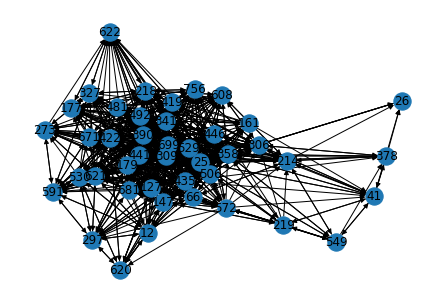

In [ ]:
print(get_triangles(G = G, node = 25))
whatsapp_tries = get_triangles(G = G, node = 25)

# drawing out the subgraph composed of those nodes to verify
l1=nx.draw(G.subgraph(get_triangles(G = G, node = 25)), with_labels = True)

    

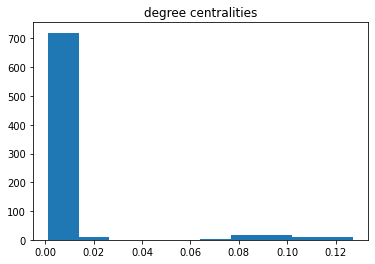

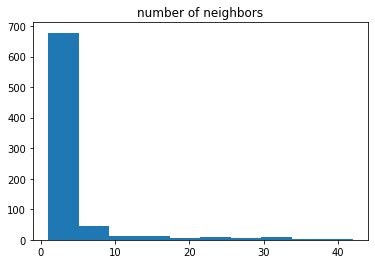

In [ ]:

 # or DiGraph, MultiGraph, MultiDiGraph, etc

centrality = list(nx.degree_centrality(G).values())

plt.hist(centrality)
plt.title('degree centralities')
plt.show()



neighbor = [len(list(G.neighbors(n))) for n in G]

plt.hist(neighbor)
plt.title('number of neighbors')
plt.show()

In [ ]:
#import random
#k = 500
#sampled_nodes = random.sample(G.nodes, k)
#sampled_graph = G.subgraph(sampled_nodes)
#nx.draw(sampled_graph)

In [ ]:
#sorted(G.degree, key=lambda x: x[1], reverse=True)

In [ ]:
#print(nx.is_connected(G))
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)

#whatsapp_and_viber = nx.shortest_path(G, source=25, target=185)
#print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

#print("Length of that path:", len(whatsapp_and_viber)-1)

print("Diameter: ", nx.diameter(G, e=None, usebounds=False) )

DiGraph with 780 nodes and 2778 edges
Network density: 0.004571936407623186


NetworkXError: ignored

In [ ]:
from networkx.drawing.nx_pydot import graphviz_layout

def noskip_subgraph(g):
    nodes_to_rm = set()
    for node, skip in g.nodes(data="skip"):
        if not skip:
            continue

        nodes_to_rm.update(nx.descendants(g, node))

    return G.subgraph(G.nodes - nodes_to_rm)

g3 = noskip_subgraph(G)

#layout = graphviz_layout(G, prog="dot")

#nx.draw(g3, pos=layout, with_labels=True)
#plt.savefig("graph3.png")

In [ ]:
import networkx as nx
def plot_graph(nodes, edges, labels=False, node_size=False,
               node_color='r', arrows=False, alpha=0.1):
    """nodes: list of nodes. Used as labels if labels=True
       edges: list of edges. Edges are tuples.
       node_size: size or list of sizes
       node_color: color or list of colors
    """
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    nx.draw(G, with_labels=labels, node_color=node_color,
            node_size=node_size, arrows=arrows, alpha=alpha)

In [ ]:
import pandas as pd
import numpy as np
import random
#!pip install clean-text

file_list=["/content/drive/MyDrive/Play/title.txt","/content/drive/MyDrive/Play/publisher.txt","/content/drive/MyDrive/Play/app_desc.txt.csv",
           "/content/drive/MyDrive/playstore/app_tag.txt", "/content/drive/MyDrive/playstore/content_class.txt", "/content/drive/MyDrive/playstore/ratings.txt","/content/drive/MyDrive/playstore/agg_r.txt","/content/drive/MyDrive/playstore/installs.txt"]
  
df_title = pd.read_csv((path_title), sep="," , names=['nodeid','title'])
df_pub = pd.read_csv((path_publisher), sep="," , names=['nodeid','Publisher'])
df_desc = pd.read_csv((path_desc), sep="," , names=['nodeid','Description'])
df_tag = pd.read_csv((path_tag), sep="," , names=['nodeid','Tag'])
df_class = pd.read_csv((path_class), sep="," , names=['nodeid','class'])
df_ratings = pd.read_csv((path_ratings), sep="|" , names=['nodeid','Ratings'])
df_agg = pd.read_csv((path_agg_ratings), sep="," , names=['nodeid','Aggregate_rating'])
df_installs = pd.read_csv((path_installs), sep="|" , names=['nodeid','Installs'])

df_fin = pd.DataFrame()

df_fin['nodeid'] = df_title['nodeid']
df_fin['Title'] = df_title['title']
df_fin['Description'] =df_desc['Description']
df_fin['App_tags'] = df_pub['Publisher']
df_fin['Publisher_info'] = df_tag['Tag']
df_fin['Class'] = df_class['class']
df_fin['Ratings'] = df_ratings['Ratings']
df_fin['Agg_Ratings'] = df_agg['Aggregate_rating']
df_fin['installs'] =  df_installs['Installs']


#print(df_fin[''].unique())


df_installs

#df_fin
df_fin

df_ratings

val = df_fin["installs"].isna().sum()
val

df_fin['installs'] = df_fin['installs'].str.replace(r"[\"\',]", '')
df_fin['Agg_Ratings'] = df_fin['Agg_Ratings'].str.replace(r"[\"\',]", '')
df_fin['Ratings'] = df_fin['Ratings'].str.replace(r"[\"\',]", '')

df_fin['Title'] = df_fin['Title'].str.replace(r"[\"\',]", '')
df_fin['Publisher_info'] = df_fin['Publisher_info'].str.replace(r"[\"\',]", '')
df_fin['Class'] = df_fin['Class'].str.replace(r"[\"\',]", '')

df_fin

df_fin['installs'] = df_fin['installs'].str.replace(r"[\"\',]", '')
df_fin['Agg_Ratings'] = df_fin['Agg_Ratings'].str.replace(r"[\"\',]", '')
df_fin['Ratings'] = df_fin['Ratings'].str.replace(r"[\"\',]", '')

df_fin['installs'] = df_fin['installs'].str.replace('\W', '')
df_fin['Agg_Ratings'] = df_fin['Agg_Ratings'].str.replace('\W', '')
df_fin['Ratings'] = df_fin['Ratings'].str.replace('\W', '')

df_fin['Ratings'] = df_fin['Ratings'].replace(np.nan, 0)
#df_fin['installs'] = df_fin['installs'].astype(np.int64)
df_fin['Agg_Ratings'] = df_fin['Agg_Ratings'].astype(np.int64)
df_fin['Ratings'] = df_fin['Ratings'].astype(np.int64)

df_fin['installs'].unique()
df_fin['Agg_Ratings'].unique()
df_fin['Ratings'].unique()
valnew1 = df_fin.loc[df_fin['installs'].str.contains("Varieswithdevice",na=False ,case=False)]
valnew1

df_fin.at[630,'installs']= random.randint(2000, 100000)
df_fin['installs'] = df_fin['installs'].astype(np.int64)



df_fin = df_fin.set_index('nodeid')

In [ ]:
    from cleantext import clean
    txt = "new "   
    data = clean(
        txt,
        fix_unicode=True,
        lower=True,
        no_line_breaks=False,
        no_urls=False,
        no_emails=False,
        no_phone_numbers=False,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=False,
        no_punct=False,
        replace_with_punct='',
        replace_with_url='<URL>',
        replace_with_email='<EMAIL>',
        replace_with_phone_number='<PHONE>',
        replace_with_number='<NUMBER>',
        replace_with_digit='0',
        replace_with_currency_symbol='<CUR>',
        lang='en',
        )
    data

'new'

In [ ]:
#!pip install clean-text
#!pip install cleantext
from cleantext import clean

def clean_all(uncleanlist):
  cleandata =[]
  for txt in uncleanlist:
    data = clean(
        txt,
        fix_unicode=True,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=True,
        no_digits=True,
        no_currency_symbols=True,
        no_punct=True,
        replace_with_punct='',
        replace_with_url='<URL>',
        replace_with_email='<EMAIL>',
        replace_with_phone_number='<PHONE>',
        replace_with_number='<NUMBER>',
        replace_with_digit='0',
        replace_with_currency_symbol='<CUR>',
        lang='en',
        )
    cleandata.append(data)

  return cleandata



In [ ]:
unclean_text = df_desc['Description'].tolist()

desc_clean = clean_all(unclean_text)
len(desc_clean)
#len(unclean_text)



780

In [ ]:
df_desc['desc_clean'] = desc_clean

df_desc

,nodeid,Description,desc_clean
0,0,The best Wikipedia experience on your Mobile d...,the best wikipedia experience on your mobile d...
1,1,also called app is one of the best media pla...,also called app is one of the best media playe...
2,2,integrate directly into your WhatsApp sticke...,integrate directly into your whatsapp stickers...
3,3,Meet our NEW version Better and fasterFree mob...,meet our new version better and fasterfree mob...
4,4,Lark player is the it can play all major form...,lark player is the it can play all major forma...
...,...,...,...
775,775,Send any images in any format webp png etc fr...,send any images in any format webp png etc fro...
776,776,Convert mp4 to mp3 video to audio cut video an...,convert mp0 to mp0 video to audio cut video an...
777,777,PicShot photo editor app comes with many one t...,picshot photo editor app comes with many one t...
778,778,SPARKvue is a popular data collection visualiz...,sparkvue is a popular data collection visualiz...


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(df_desc.desc_clean)]
#display the tagged docs
card_docs

model = Doc2Vec(vector_size=64, min_count=1, epochs = 200)
#instantiate model
model = Doc2Vec(vector_size=64, window=4, min_count=1, workers=8, epochs = 200)
#build vocab
model.build_vocab(card_docs)
#train model
model.train(card_docs, total_examples=model.corpus_count
            , epochs=model.epochs)

In [ ]:
import numpy as np

card2vec = [model.infer_vector((df_desc['desc_clean'][i].split(' '))) 
            for i in range(0,len(df_desc['desc_clean']))]
card2vec
card2VecRandomVectors = model.infer_vector(["system", "response"])
#Create a list of lists
dtv_emb= np.array(card2vec).tolist()

In [ ]:
df_whatsSubG = df_fin.iloc[list(whatsapp_tries)]

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='App_tags',data=df_whatsSubG)
plt.xticks(rotation=70)



NameError: ignored

In [ ]:
df_fin

df_features = pd.DataFrame.from_records(dtv_emb)
df_embeddings.insert(0, 'nodeid', df_desc['nodeid'])

df_features = df_embeddings.set_index("nodeid")
#df_embeddings


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
nodeid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.667750,4.837050,4.815174,0.517736,4.666547,2.475139,-1.677474,-4.134085,1.154720,-0.898699,1.969582,4.537879,1.888637,-4.841591,-0.273742,0.670923,0.757416,-2.919243,0.097549,-0.828758,-3.604260,-0.927352,1.854080,1.950129,0.066386,-0.752144,-6.456038,-0.608890,-0.445133,1.898247,0.186407,-2.446788,1.832174,-1.928198,-0.478422,3.115437,3.853379,-0.358281,5.159122,4.649885,-0.981064,-3.461860,-3.360442,-3.846832,1.626735,2.223489,-4.461883,3.787934,1.418857,-4.048252,0.003076,-0.173574,2.871294,1.252923,1.134961,-1.378576,1.021762,1.346615,2.471054,1.752734,4.679471,-1.269490,0.857626,5.424692
1,0.761720,-3.460952,1.068010,-0.911344,-0.090991,2.433660,-5.291840,-0.048550,-3.692532,-2.742885,3.010883,-3.586381,1.857450,0.068045,-2.771108,2.018744,-0.779579,3.950338,-5.417339,0.678315,1.603138,-1.476232,-3.085407,1.082254,2.885811,-1.433359,-3.915179,-0.475669,0.284055,-0.486790,2.407022,-3.225726,2.931768,0.987387,0.595587,1.665330,6.416412,1.883145,3.554424,-2.970146,-0.827138,-1.102493,0.221933,-0.018659,4.261061,1.950917,-1.722305,0.239340,3.472299,0.257000,3.766179,-3.931420,4.220013,4.721595,0.628168,-0.286417,-0.643937,2.177053,1.218263,4.200763,3.705733,-3.285008,-2.887574,-2.276260
2,-0.849180,2.408368,1.857910,-0.763752,-1.432843,-3.596741,1.010433,-1.308383,-3.566689,-1.163553,2.972171,1.132225,0.393277,-1.144499,0.911173,2.491109,1.905518,0.950595,-2.504905,-4.345242,-5.054310,-1.878359,-2.526589,2.498003,1.535238,-1.283216,-4.957915,-0.396669,5.494016,1.743498,-2.183067,0.995373,0.195331,-2.006095,2.190678,8.397601,1.853129,3.569284,-3.290205,0.147745,-1.832044,-3.930204,1.171619,-3.842644,-2.441340,-1.696450,-1.587490,2.398581,-4.088221,1.316429,-1.735332,2.082088,1.995943,2.544941,-1.185022,-2.641565,-1.380707,-4.518439,1.184815,4.086341,0.333598,-0.640037,2.717966,0.132996
3,-0.920720,0.186871,-0.490772,-1.549490,-0.992165,3.393567,-0.812580,-0.210312,1.083040,-3.482267,7.133670,1.041092,-0.643357,-2.495319,-0.656916,-3.047356,0.739028,2.337601,-4.718823,-0.083663,-2.852504,-4.877439,-2.203156,0.915642,-1.865493,-3.575755,-0.255863,-5.012040,4.958413,0.585615,0.742336,1.127159,-1.171439,-1.668498,-0.919805,3.138624,6.050991,1.706398,1.800045,1.982144,-2.274873,-3.830089,-2.399407,-0.438866,4.098925,3.121512,1.328551,2.637683,3.347990,0.016148,-1.142080,-4.551584,-3.278908,5.664825,1.970649,-1.526205,-0.294643,1.830627,3.730859,-4.756645,2.012396,-5.188412,-3.172821,-0.224873
4,1.532858,-0.299980,2.095287,1.760699,-0.412551,0.581562,-6.151035,-2.111097,-4.532754,-0.562650,2.714731,0.234377,2.619375,0.472725,-4.306279,0.937019,-1.323281,1.064901,-3.414781,-1.404045,-0.359441,0.817622,-3.895609,1.682312,2.446123,0.186371,-2.320287,-1.488865,-0.331699,-4.927895,2.521335,-3.516433,-0.376955,-3.842162,-2.689183,2.670197,5.357785,1.362585,1.105166,1.045820,-0.484853,3.621999,1.001886,-1.471308,6.294374,3.605263,-3.749440,-0.529890,2.339843,0.702724,-0.444673,-0.411260,0.060581,0.540471,-0.850000,0.223556,1.245338,0.721406,2.513990,0.406029,3.904914,-5.071096,1.707829,-0.934323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.334096,1.291081,-1.119138,-0.966667,0.972695,-1.450747,-0.221446,-0.171677,-0.236189,-5.013690,4.474471,-0.545208,-0.413614,0.184808,-4.309208,-5.156159,2.784069,-4.334826,-1.563586,0.200522,-6.519164,0.509444,-0.723105,1.429109,-0.400822,-1.454136,-3.505059,-3.706498,4.508547,-5.199608,-5.440335,0.203729,4.259673,1.829288,2.830041,7.873280,-0.035020,4.610629,1.146329,3.701598,-1.668844,-0.209466,0.162875,-2.788242,4.310774,-0.964893

In [ ]:
## working correctly
node_centralities = {}
for key,val in popular_nodes:
  #print(key)
  node_centralities[key] = nx.betweenness_centrality(G,normalized=False)[key]
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    node_centralities[lst] = nx.betweenness_centrality(G,normalized=False)[lst]

(('WhatsApp Messenger', 'AppLock'), ('WhatsApp Messenger', 'VLC for Android'), ('WhatsApp Messenger', 'Truecaller: Caller ID & Block'), ('WhatsApp Messenger', 'Status Saver for WhatsApp: Video Status Downloader'), ('WhatsApp Messenger', 'Samsung Calculator'), ('WhatsApp Messenger', 'Status Saver - Download for Whatsapp'), ('WhatsApp Messenger', 'Google Chrome: Fast & Secure'), ('WhatsApp Messenger', 'AppLock - Lock apps & Password'), ('WhatsApp Messenger', 'WhatsApp Wallpaper'), ('WhatsApp Messenger', 'Opera Mini - fast web browser'), ('WhatsApp Messenger', 'Likee - Let You Shine'), ('WhatsApp Messenger', 'LinkedIn: Jobs & Business News'), ('WhatsApp Messenger', 'Bigo Live - Live Streaming App'), ('WhatsApp Messenger', 'ZEDGEâ\\x84¢ Wallpapers & Ringtones'), ('WhatsApp Messenger', 'Gallery - Hide Pictures and Videos'), ('WhatsApp Messenger', 'WhatsApp Business'), ('WhatsApp Messenger', 'Facebook Lite'), ('WhatsApp Messenger', 'Snapchat'), ('WhatsApp Messenger', 'Skype'), ('WhatsApp Mes

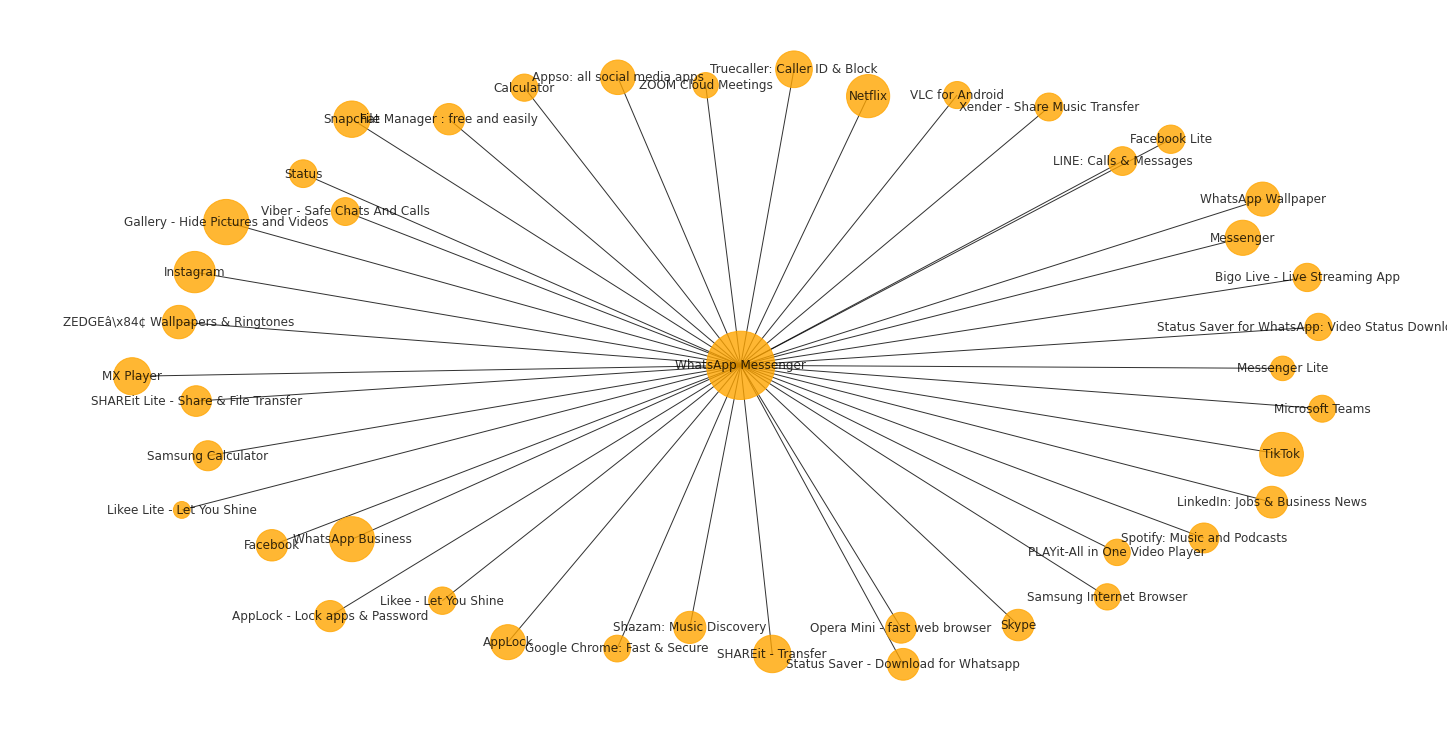

In [ ]:
# Plotting graph for popular nodes

node_neighbors = [(n, list(G.neighbors(n))) for n in G.nodes()]
popular_nodes = sorted(node_neighbors, key = lambda x: len(x[1]), reverse = True)[:1]
popular_nodes


node_centralities = {}
for key,val in popular_nodes:
  #print(key)
  appName_2 = df_fin["Title"].iloc[key]
  node_centralities[appName_2] = nx.betweenness_centrality(G,normalized=False)[key]
  #val_new = df_fin["Title"].iloc[key]
  for lst in val:
    #print(key)
    appName_1 = df_fin["Title"].iloc[lst]
    node_centralities[appName_1] = nx.betweenness_centrality(G,normalized=False)[lst]
      

  #print(val_new,nx.betweenness_centrality(G,normalized=False)[key])

node_centralities

Edge_pairs = []
for key,val in popular_nodes:
  #print(key)
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    #print(key)
    val_new1 = df_fin["Title"].iloc[lst]
    Edge_pairs.append((val_new,val_new1))
Edge_pairs = tuple(Edge_pairs) 
  #print(val_new,nx.betweenness_centrality(G,normalized=False)[key])
print(Edge_pairs)



node_centralities
nodeList = [(k, v) for k, v in node_centralities.items()]
nodeList


import pandas as pd
# Node data

Apps1 = pd.DataFrame(nodeList,columns=['AppName', 'Betweeness'])
# Edge data
connections1 = pd.DataFrame(Edge_pairs,
                      columns=['start', 'stop'])
plot_graph(nodes=Apps1['AppName'],
           edges=[tuple(row) for row in connections1.values],
           labels=True,
           node_color='orange',
           node_size=Apps1['Betweeness'],
           alpha=0.8)

In [ ]:
sns.barplot(x = 'AppName',
            y = 'Betweeness',
            data = Apps1)
 
# Show the plot
plt.show()

NameError: ignored

(('WhatsApp Messenger', 'AppLock'), ('WhatsApp Messenger', 'VLC for Android'), ('WhatsApp Messenger', 'Truecaller: Caller ID & Block'), ('WhatsApp Messenger', 'Status Saver for WhatsApp: Video Status Downloader'), ('WhatsApp Messenger', 'Samsung Calculator'), ('WhatsApp Messenger', 'Status Saver - Download for Whatsapp'), ('WhatsApp Messenger', 'Google Chrome: Fast & Secure'), ('WhatsApp Messenger', 'AppLock - Lock apps & Password'), ('WhatsApp Messenger', 'WhatsApp Wallpaper'), ('WhatsApp Messenger', 'Opera Mini - fast web browser'), ('WhatsApp Messenger', 'Likee - Let You Shine'), ('WhatsApp Messenger', 'LinkedIn: Jobs & Business News'), ('WhatsApp Messenger', 'Bigo Live - Live Streaming App'), ('WhatsApp Messenger', 'ZEDGEâ\\x84¢ Wallpapers & Ringtones'), ('WhatsApp Messenger', 'Gallery - Hide Pictures and Videos'), ('WhatsApp Messenger', 'WhatsApp Business'), ('WhatsApp Messenger', 'Facebook Lite'), ('WhatsApp Messenger', 'Snapchat'), ('WhatsApp Messenger', 'Skype'), ('WhatsApp Mes

{'AppLock': 385.8345715700842,
 'AppLock - Lock apps & Password': 388.3349950149551,
 'Appso: all social media apps': 456.89149560117306,
 'Bigo Live - Live Streaming App': 406.15224191866525,
 'Calculator': 402.37603305785126,
 'Facebook': 480.8641975308642,
 'Facebook Lite': 480.2712700369914,
 'File Manager : free and easily': 383.1775700934579,
 'Gallery - Hide Pictures and Videos': 408.4950183534347,
 'Google Chrome: Fast & Secure': 412.3875066172578,
 'Instagram': 469.8431845597105,
 'LINE: Calls & Messages': 404.04564315352695,
 'Likee - Let You Shine': 425.9158009841443,
 'Likee Lite - Let You Shine': 433.7416481069042,
 'LinkedIn: Jobs & Business News': 390.86803813346717,
 'MX Player': 423.59978249048396,
 'Messenger': 470.9794437726723,
 'Messenger Lite': 453.9627039627039,
 'Microsoft Teams': 395.0304259634889,
 'Netflix': 425.2183406113537,
 'Opera Mini - fast web browser': 382.0500245218244,
 'PLAYit-All in One Video Player': 422.680412371134,
 'SHAREit - Transfer': 466.4

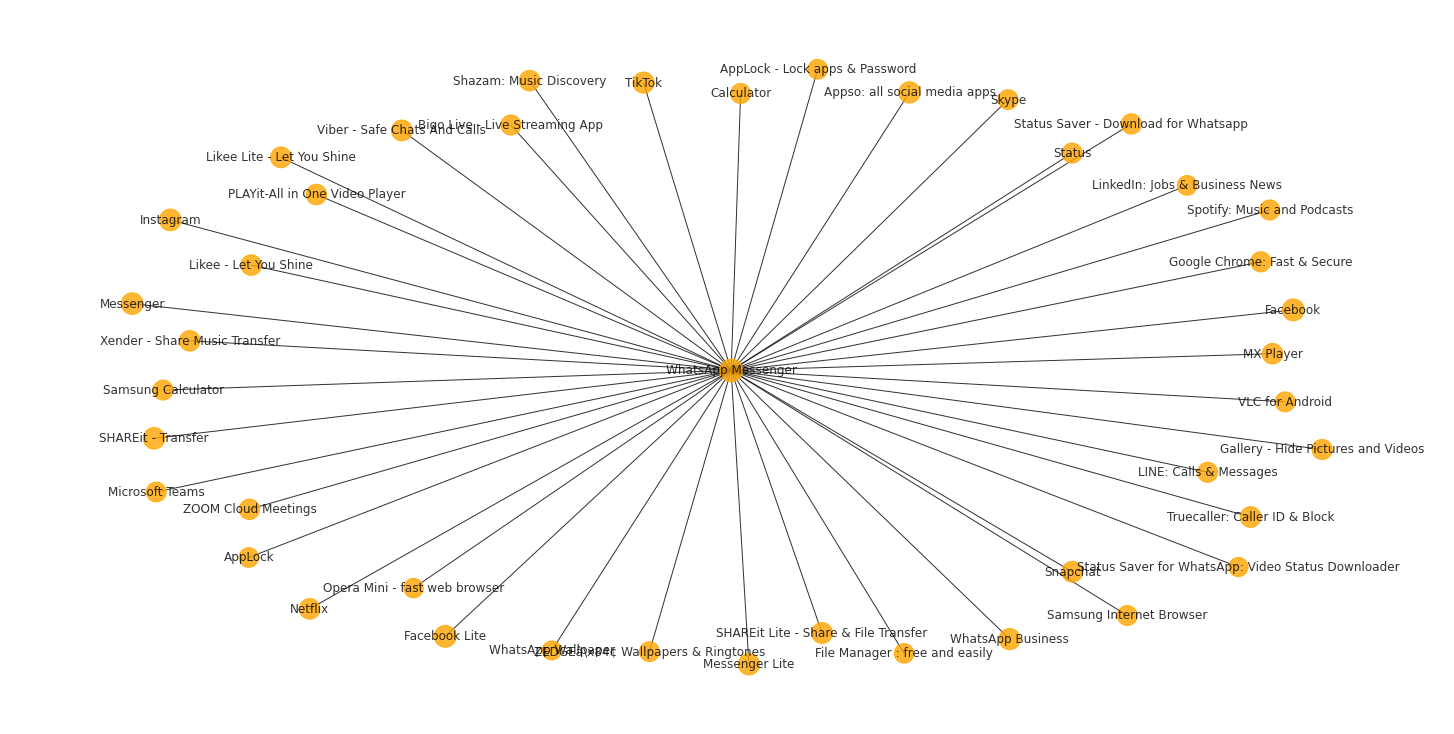

In [ ]:
node_neighbors = [(n, list(G.neighbors(n))) for n in G.nodes()]
popular_nodes = sorted(node_neighbors, key = lambda x: len(x[1]), reverse = True)[:1]
popular_nodes

node_closeness_centralities = {}
for key,val in popular_nodes:
  #print(key)
  appName_2 = df_fin["Title"].iloc[key]
  node_closeness_centralities[appName_2] = nx.closeness_centrality(G)[key]*1000
  #val_new = df_fin["Title"].iloc[key]
  for lst in val:
    #print(key)
    appName_1 = df_fin["Title"].iloc[lst]
    node_closeness_centralities[appName_1] = nx.closeness_centrality(G)[lst]*1000
      

  #print(val_new,nx.betweenness_centrality(G,normalized=False)[key])

node_closeness_centralities

Edge_pairs = []
for key,val in popular_nodes:
  #print(key)
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    #print(key)
    val_new1 = df_fin["Title"].iloc[lst]
    Edge_pairs.append((val_new,val_new1))
Edge_pairs = tuple(Edge_pairs) 
  #print(val_new,nx.betweenness_centrality(G,normalized=False)[key])
print(Edge_pairs)



node_closeness_centralities
nodeList = [(k, v) for k, v in node_closeness_centralities.items()]
nodeList


import pandas as pd
# Node data

Apps = pd.DataFrame(nodeList,columns=['AppName', 'Betweeness'])
# Edge data
connections = pd.DataFrame(Edge_pairs,
                      columns=['start', 'stop'])
plot_graph(nodes=Apps['AppName'],
           edges=[tuple(row) for row in connections.values],
           labels=True,
           node_color='orange',
           node_size=Apps['Betweeness'],
           alpha=0.8)

node_closeness_centralities

In [ ]:
sns.barplot(x = 'AppName',
            y = 'Betweeness',
            data = Apps)
 
# Show the plot
plt.show()

NameError: ignored

In [ ]:
Edge_pairs = []
for key,val in popular_nodes:
  #print(key)
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    #print(key)
    Edge_pairs.append((key,lst))
Edge_pairs = tuple(Edge_pairs) 
  #print(val_new,nx.betweenness_centrality(G,normalized=False)[key])
print(Edge_pairs)

((25, 219), (25, 699), (25, 66), (25, 378), (25, 12), (25, 214), (25, 422), (25, 549), (25, 26), (25, 608), (25, 506), (25, 273), (25, 177), (25, 161), (25, 572), (25, 358), (25, 419), (25, 681), (25, 327), (25, 435), (25, 218), (25, 530), (25, 620), (25, 41), (25, 622), (25, 446), (25, 179), (25, 297), (25, 529), (25, 127), (25, 756), (25, 621), (25, 341), (25, 481), (25, 390), (25, 492), (25, 306), (25, 309), (25, 671), (25, 591), (25, 441), (25, 147))


In [ ]:
node_centralities_num = {}
for key,val in popular_nodes:
  #print(key)
  node_centralities_num[key] = nx.betweenness_centrality(G,normalized=False)[key]
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    node_centralities_num[lst] = nx.betweenness_centrality(G,normalized=False)[lst]

In [ ]:
node_centralities_num
nodeList = [(k, v) for k, v in node_centralities_num.items()]
nodeList


import pandas as pd
# Node data

new = pd.DataFrame(nodeList,columns=['AppName', 'Betweeness'])

#nx.betweenness_centrality(G,normalized=False)[219]
app_count = df_fin.iloc[new['AppName']]

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='App_tags',data=app_count)
plt.xticks(rotation=70)

NameError: ignored

In [ ]:
node_closeness_centralities_num = {}
for key,val in popular_nodes:
  #print(key)
  node_closeness_centralities_num[key] = nx.closeness_centrality(G)[key]
  val_new = df_fin["Title"].iloc[key]
  for lst in val:
    node_closeness_centralities_num[lst] = nx.closeness_centrality(G)[lst]



node_closeness_centralities_num
nodeList = [(k, v) for k, v in node_closeness_centralities.items()]
nodeList


import pandas as pd
# Node data

Apps = pd.DataFrame(nodeList,columns=['AppName', 'Closeness'])
# Edge data

#nx.betweenness_centrality(G,normalized=False)[219]
app_count = df_fin.iloc[new['AppName']]

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='App_tags',data=app_count)
plt.xticks(rotation=70)

NameError: ignored

In [ ]:
nx.betweenness_centrality(G,normalized=False)[219]

1225.75586326495

In [ ]:
df_fin.head(6)

,Title,Description,App_tags,Publisher_info,Class,Ratings,Agg_Ratings,installs,broad_genre
nodeid,,,,,,,,,
0,Wikipedia,The best Wikipedia experience on your Mobile d...,Books & Reference,Wikimedia Foundation,Everyone,667888,45,50000000,Others
1,Music player,also called app is one of the best media pla...,Music & Audio,gspro,Everyone,70273,48,1000000,Music & Audio
2,WhatSmiley: stickers,integrate directly into your WhatsApp sticke...,Social,SiA - Smileys,Teen,152136,46,10000000,Others
3,4shared,Meet our NEW version Better and fasterFree mob...,Entertainment,New IT Solutions,Everyone,796800,45,50000000,Others
4,Music Player & MP3 Player - Lark Player,Lark player is the it can play all major form...,Music & Audio,Lark Player Studio,Teen,2679619,46,100000000,Music & Audio
5,IGTV from Instagram - Watch IG Videos & Clips,Discover videos clips shows and vlogs from you...,Entertainment,Instagram,Teen,94202,44,10000000,Others


'some input'

In [ ]:
s = df_fin.App_tags.value_counts().index[:4]
def categ(x,s):
    if x in s:
        return x
    else : 
        return "Others"

df_fin['broad_genre']= df_fin.App_tags.apply(lambda x : categ(x,s))

In [ ]:
df_fin_new = df_fin.drop('Title', 1)
df_fin_new = df_fin_new.drop('Description', 1)

df_fin_new
cols = ['App_tags','Class', 'Publisher_info','broad_genre']
df_fin_new[cols] = df_fin_new[cols].astype('category')

df_fin_new.info()


from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_fin_new['App_tags']= label_encoder.fit_transform(df_fin_new['App_tags'])
df_fin_new['Class']= label_encoder.fit_transform(df_fin_new['Class'])
df_fin_new['Publisher_info']= label_encoder.fit_transform(df_fin_new['Publisher_info'])
df_fin_new['broad_genre']= label_encoder.fit_transform(df_fin_new['broad_genre'])
df_fin_new

#df_fin_new
df_fin_new




<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App_tags        780 non-null    category
 1   Publisher_info  780 non-null    category
 2   Class           780 non-null    category
 3   Ratings         780 non-null    int64   
 4   Agg_Ratings     780 non-null    int64   
 5   installs        780 non-null    int64   
 6   broad_genre     780 non-null    category
dtypes: category(4), int64(3)
memory usage: 54.1 KB


In [ ]:
df_features['label'] = df_fin_new['broad_genre']
feature_names = set(df_features.columns) - {"nodeid", "label"}
num_features = len(feature_names)
print ("num_features:", num_features)
num_classes = set(df_features['label'].tolist())
print("num_classes:", num_classes)


num_features: 64
num_classes: {0, 1, 2, 3, 4}


In [ ]:
train, validate, test = \
              np.split(df_features.sample(frac=1, random_state=42), 
                       [int(.6*len(df_fin_new)), int(.8*len(df_fin_new))])
              
train
validate
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,label
nodeid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
768,-2.440715,3.274597,-1.299150,1.352891,-4.219380,3.570961,0.488494,-2.142720,1.924137,-3.356732,2.091487,-0.448800,-5.417432,-2.916585,-3.082360,-2.761667,-0.471040,0.777160,1.822150,-0.410591,-1.557306,0.586538,2.698624,2.420256,3.596061,-4.673971,-6.547161,-1.756981,6.494029,-0.718240,-4.059674,-1.880787,2.819312,-4.006677,2.409733,2.902689,3.254727,-1.034946,0.817789,-2.390574,2.257651,-0.150815,0.340368,-3.948036,-1.045720,3.318418,1.459262,-1.978459,1.803031,4.174257,-2.898309,-2.349358,-0.535417,-0.054681,3.004139,-1.594780,-1.151899,-3.352036,2.153389,0.169180,3.577138,-2.553575,-0.681669,-0.203772,4
721,3.735554,-1.322415,2.910730,-3.285093,0.046712,0.285613,-2.359229,6.015340,-2.418105,-0.586602,-0.515718,-1.921781,-1.602800,-2.090159,-6.351980,-2.908194,-1.759155,-2.226793,-0.339571,-4.891363,-2.241332,-2.859130,3.403565,-4.551561,2.160631,-4.292078,-1.746479,-6.873021,2.330194,-2.151878,3.780504,2.409304,3.033010,-1.511545,1.719344,6.528185,0.983019,2.488481,-0.114213,-2.673471,-0.184137,-3.821704,-4.323040,-0.966418,-0.638221,-0.246170,-1.024006,-2.340449,-1.040688,1.623002,-0.993795,5.295865,7.117502,0.748221,0.014355,-6.059590,1.183536,-1.621235,-0.243412,2.671056,0.060296,-6.337385,4.656717,-0.628525,3
703,1.092512,-3.732783,-4.100805,-1.092869,-0.208024,-1.612358,-3.833402,0.330698,-1.612077,-2.047851,4.949035,-3.958787,-0.302101,-5.020318,-1.423821,0.719813,1.302542,1.088178,-2.860987,-0.638716,1.673388,-4.555256,-1.466370,0.233698,2.153543,-1.253383,-1.050548,-0.137852,0.284613,-0.193043,4.024885,-1.212141,-2.000136,-5.535161,0.756983,2.809082,1.670985,2.446121,-4.054412,-1.842433,-0.564065,1.626419,3.072047,-0.702604,-0.599971,-1.895014,-1.767180,1.775369,2.265087,5.080607,-2.155719,-3.459201,0.986158,4.105037,-1.561824,0.354524,0.209897,1.543342,2.098032,1.704553,2.701780,3.177597,-0.083818,-2.514014,2
619,1.223377,-0.950532,1.201613,-1.459285,4.589165,-0.478323,-1.484945,-0.621504,-0.646048,-3.607041,3.216758,0.743371,1.098272,-2.751911,-1.366192,0.040154,0.159146,0.945121,-4.374418,-1.327504,-1.784006,-2.848696,2.406508,3.806063,-0.691485,-2.972454,-4.873217,-0.488472,2.690815,3.325069,-1.324372,-1.175223,3.000725,-4.299369,3.358414,3.549910,1.126391,2.740974,0.054813,2.122052,-1.652710,-3.682514,0.564079,-8.000381,-3.724745,1.357891,-1.904335,2.222802,0.014745,5.493141,-4.407524,0.761483,1.542182,1.676787,-2.054470,-1.052699,-3.460063,2.209039,2.424864,4.253818,0.500576,0.664448,-4.233199,-2.289248,2
667,-1.702941,-2.147295,4.520837,-0.391724,-0.516165,1.314536,-0.733333,-1.091320,-5.046765,-6.455207,3.037444,0.588657,1.643362,-1.457911,-2.621621,0.940735,1.314236,-0.871625,-2.189991,1.364826,-3.865772,-2.352547,-3.934627,0.150184,4.326642,0.069040,-4.795943,-1.643082,-0.735879,-2.232123,1.431734,-3.697692,3.868757,-2.776099,4.833061,5.677596,-0.812396,2.145161,-0.461810,1.166635,2.654603,3.325391,1.193139,-4.302548,-2.009306,-0.631629,-0.762612,-1.078904,-0.229209,-1.287275,-1.230579,-1.093352,1.315685,0.427393,1.867528,-0.668810,1.798002,1.590999,-1.629143,0.790063,3.819871,-0.794749,3.935878,2.083858,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.543775,-0.319675,-1.011405,-0.933834,-1.772450,0.666223,-1.159313,-3.745152,0.962336,-1.478689,1.069194,0.155546,-2.947696,-0.157378,-3.656519,-1.921335,-0.623432,-1.148013,0.569517,1.656096,-6.426785,-1.101813,4.411021,-1.932504,1.993293,-6.063193,-1.379702,-1.861147,2.893114,-2.590755,-0.211159,0.287387,-1.489620,1.100254,-0.561615,7.505895,1.151662,1.526722,0.894189,0.448965,-0

In [ ]:
x_train = train[feature_names].to_numpy()
x_valid = validate[feature_names].to_numpy()
x_test = test[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train["label"]
y_valid = validate["label"]
y_test = test['label']

In [ ]:
from sklearn import preprocessing, feature_extraction, model_selection

target_encoding = preprocessing.LabelBinarizer()

train_targets = target_encoding.fit_transform(y_train)
val_targets = target_encoding.transform(y_valid)

train_targets.shape

(468, 5)

In [ ]:
#!pip install stellargraph
import pandas as pd
import os
import stellargraph as sg
from stellargraph.mapper import DirectedGraphSAGENodeGenerator
from stellargraph.layer import DirectedGraphSAGE

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
from stellargraph import StellarDiGraph



no_cat_g = StellarDiGraph({"node": df_features}, {"links": edges_df})
print(no_cat_g.info())

batch_size = 256
in_samples = [5, 2]
out_samples = [5, 2]

generator = DirectedGraphSAGENodeGenerator(no_cat_g, batch_size, in_samples, out_samples)
train_gen = generator.flow(y_train.index, train_targets, shuffle=True)

graphsage_model = DirectedGraphSAGE(
    layer_sizes=[64, 64], generator=generator, bias=False, dropout=0.2,
)

x_inp, x_out = graphsage_model.in_out_tensors()
prediction = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

##
model = Model(inputs=x_inp, outputs=prediction)
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

val_gen = generator.flow(y_valid.index, val_targets)

history = model.fit(
    train_gen, epochs=200, validation_data=val_gen, verbose=2, shuffle=False
)

StellarDiGraph: Directed multigraph
 Nodes: 780, Edges: 2778

 Node types:
  node: [780]
    Features: float32 vector, length 65
    Edge types: node-links->node

 Edge types:
    node-links->node: [2778]
        Weights: all 1 (default)
        Features: none


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/200
2/2 - 3s - loss: 1.6225 - acc: 0.1880 - val_loss: 1.5824 - val_acc: 0.3526 - 3s/epoch - 1s/step
Epoch 2/200
2/2 - 0s - loss: 1.5743 - acc: 0.3590 - val_loss: 1.5366 - val_acc: 0.5128 - 401ms/epoch - 200ms/step
Epoch 3/200
2/2 - 0s - loss: 1.5402 - acc: 0.4124 - val_loss: 1.4933 - val_acc: 0.5641 - 424ms/epoch - 212ms/step
Epoch 4/200
2/2 - 0s - loss: 1.5118 - acc: 0.4915 - val_loss: 1.4551 - val_acc: 0.5769 - 416ms/epoch - 208ms/step
Epoch 5/200
2/2 - 0s - loss: 1.4784 - acc: 0.5256 - val_loss: 1.4252 - val_acc: 0.5769 - 391ms/epoch - 196ms/step
Epoch 6/200
2/2 - 0s - loss: 1.4557 - acc: 0.5363 - val_loss: 1.3938 - val_acc: 0.5769 - 410ms/epoch - 205ms/step
Epoch 7/200
2/2 - 0s - loss: 1.4338 - acc: 0.5385 - val_loss: 1.3715 - val_acc: 0.5769 - 410ms/epoch - 205ms/step
Epoch 8/200
2/2 - 0s - loss: 1.4099 - acc: 0.5385 - val_loss: 1.3536 - val_acc: 0.5769 - 463ms/epoch - 232ms/step
Epoch 9/200
2/2 - 0s - loss: 1.3905 - acc: 0.5385 - val_loss: 1.3362 - val_acc: 0.5769 - 386ms

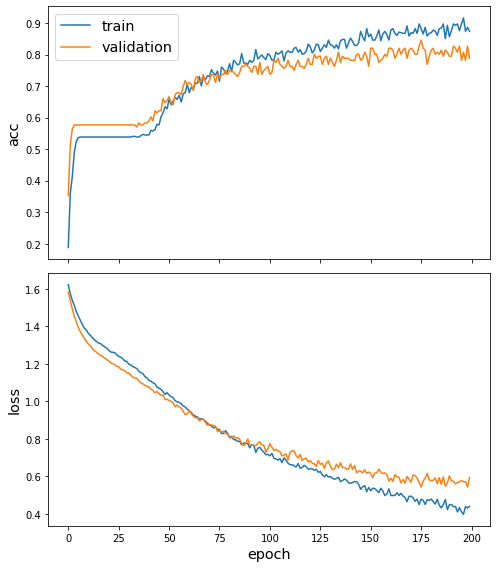

In [ ]:
sg.utils.plot_history(history)

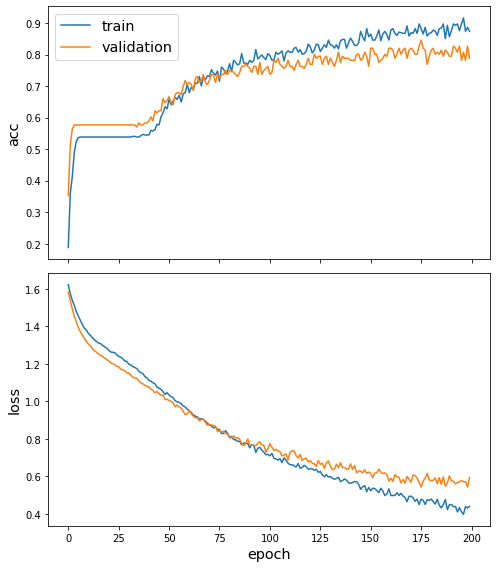

In [ ]:
sg.utils.plot_history(history)

In [ ]:
all_nodes = test.index
all_mapper = generator.flow(all_nodes)
all_predictions = model.predict(all_mapper)

all_predictions

array([[0.02979048, 0.01642648, 0.7146443 , 0.0189641 , 0.2201746 ],
       [0.04776095, 0.07147174, 0.04809046, 0.78214973, 0.0505271 ],
       [0.02051281, 0.04514373, 0.8972825 , 0.01871021, 0.01835071],
       [0.01511527, 0.02829762, 0.90014076, 0.01662624, 0.03982007],
       [0.02215883, 0.01279607, 0.92539465, 0.0154763 , 0.02417417],
       [0.09381405, 0.01924737, 0.15802099, 0.08111464, 0.64780295],
       [0.02085495, 0.01702466, 0.38857985, 0.03838569, 0.53515494],
       [0.07609775, 0.60375094, 0.14086144, 0.12260012, 0.05668977],
       [0.04850028, 0.06546956, 0.05041805, 0.7842836 , 0.05132856],
       [0.01900993, 0.25364113, 0.3683045 , 0.27998415, 0.07906027],
       [0.04282225, 0.06764288, 0.05476479, 0.7821134 , 0.05265668],
       [0.02300739, 0.01404937, 0.7511978 , 0.03140773, 0.18033777],
       [0.02830442, 0.01350646, 0.9214514 , 0.01658223, 0.02015547],
       [0.01197831, 0.01519002, 0.8577189 , 0.01618463, 0.09892815],
       [0.09018806, 0.11192398, 0.

In [ ]:
all_nodes = train.index
all_mapper = generator.flow(all_nodes)
all_predictions = model.predict(all_mapper)



embedding_model = Model(inputs=x_inp, outputs=x_out)
emb = embedding_model.predict(all_mapper)
emb.shape

(468, 64)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


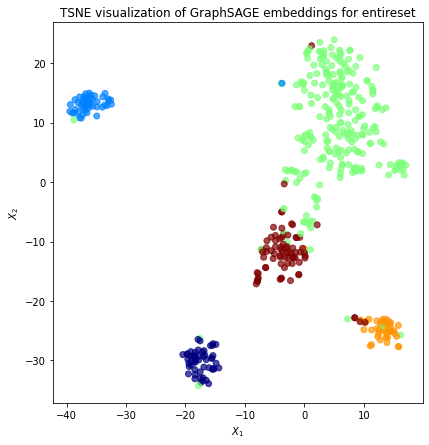

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_fin_new['Ratings'] = scaler.fit_transform(df_fin_new['Ratings'].values.reshape(-1,1))
df_fin_new['Agg_Ratings'] = scaler.fit_transform(df_fin_new['Agg_Ratings'].values.reshape(-1,1))
df_fin_new['installs'] = scaler.fit_transform(df_fin_new['installs'].values.reshape(-1,1))

df_fin_new

,App_tags,Publisher_info,Class,Ratings,Agg_Ratings,installs,broad_genre
nodeid,,,,,,,
0,6,448,0,0.004421,0.90,0.004999,2
1,20,477,0,0.000465,0.96,0.000099,1
2,29,336,3,0.001007,0.92,0.000999,2
3,13,270,0,0.005274,0.90,0.004999,2
4,20,214,3,0.017737,0.92,0.009999,1
...,...,...,...,...,...,...,...
775,11,400,0,0.000186,0.88,0.000499,0
776,34,178,0,0.002489,0.96,0.000999,2
777,23,232,0,0.001924,0.90,0.000999,3


In [ ]:
df_fin_new

,App_tags,Publisher_info,Class,Ratings,Agg_Ratings,installs,broad_genre
nodeid,,,,,,,
0,6,448,0,0.004421,0.90,0.004999,2
1,20,477,0,0.000465,0.96,0.000099,1
2,29,336,3,0.001007,0.92,0.000999,2
3,13,270,0,0.005274,0.90,0.004999,2
4,20,214,3,0.017737,0.92,0.009999,1
...,...,...,...,...,...,...,...
775,11,400,0,0.000186,0.88,0.000499,0
776,34,178,0,0.002489,0.96,0.000999,2
777,23,232,0,0.001924,0.90,0.000999,3


In [ ]:
df_fin_new['broad_genre'].unique()

array([2, 1, 4, 0, 3])

In [ ]:
feature_names = set(df_fin_new.columns) - {"nodeid", "broad_genre"}
num_features = len(feature_names)
print ("num_features:", num_features)
num_classes = set(df_fin_new['broad_genre'].tolist())
print("num_classes:", num_classes)

num_features: 6
num_classes: {0, 1, 2, 3, 4}


In [ ]:



x_train = train[feature_names].to_numpy()
x_valid = validate[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train["broad_genre"]
y_valid = validate["broad_genre"]

x_valid

dfg = pd.DataFrame(x_train)
dfg

,0,1,2,3,4,5
0,11.0,0.0,0.000250,0.000999,296.0,0.74
1,29.0,3.0,0.002268,0.000999,459.0,0.78
2,20.0,0.0,0.005584,0.000999,466.0,0.92
3,32.0,0.0,0.000152,0.000499,452.0,0.80
4,2.0,0.0,0.000006,0.000009,268.0,0.50
...,...,...,...,...,...,...
463,0.0,1.0,0.008786,0.009999,68.0,0.88
464,32.0,3.0,0.005429,0.009999,101.0,0.90
465,32.0,0.0,0.000085,0.000099,230.0,0.88
466,22.0,0.0,0.000138,0.000099,81.0,0.94


In [ ]:
x_train = df_embeddings_train[feature_names].to_numpy()
x_valid = df_embeddings_validation[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = df_embeddings_train["label"]
y_valid = df_embeddings_validation["label"]

x_valid

In [ ]:
def train_validate_test_split(df_lt, train_percent=.6, validate_percent=.2, seed=None):
    #np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df_lt.iloc[perm[:train_end]]
    validate = df_lt.iloc[perm[train_end:validate_end]]
    test = df_lt.iloc[perm[validate_end:]]
    return train, validate, test

In [ ]:
list(feature_names)
train_targets.shape


NameError: ignored

In [ ]:
## Graph node classification
#!pip install stellargraph
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import DirectedGraphSAGENodeGenerator
from stellargraph.layer import DirectedGraphSAGE

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
from stellargraph import StellarDiGraph

feature_names = set(df_fin_new.columns) - {"nodeid", "broad_genre"}
num_features = len(feature_names)
print ("num_features:", num_features)
num_classes = len(df_fin_new['broad_genre'].unique())
print("num_classes:", num_classes)

feature_names





from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = df_fin_new.drop(columns = ['Ratings', 'Publisher_info', 'Agg_Ratings', 'installs', 'Class', 'App_tags']).copy()
y = df_fin_new['broad_genre']

df_fin_fin = df_fin_new.drop(columns=['broad_genre'])

labels_sampled = df_fin_new['broad_genre'].sample(frac=0.8, replace=False, random_state=101)
G_sampled = G.subgraph(labels_sampled.index)

print('# nodes in full graph:', len(G.nodes()))
print('# nodes in sampled graph:', len(G_sampled.nodes()))

train_labels, test_labels = model_selection.train_test_split(
    labels_sampled,
    train_size=0.4,
    random_state=42,
)

# 20% of test for validation
val_labels, test_labels = model_selection.train_test_split(
    test_labels, train_size=0.2, random_state=42,
)


train_labels.shape
val_labels.shape



num_features: 6
num_classes: 5
# nodes in full graph: 780
# nodes in sampled graph: 624


(75,)

In [ ]:
layer_sizes = [32, 32] # embedding sizes at each layer
max_hops = 2 # number of hops (must be equal to len(layer_sizes))
feature_sizes = generator.graph.node_feature_sizes()
input_feature_size = feature_sizes.popitem()[1] # length of features vector
dims = [input_feature_size] + layer_sizes
neighbourhood_sizes = [1, 10, 100] # target, neighbours, neighbours' neighbours
aggregator = MeanPoolingAggregator # keras aggregation layer (explained above)
activations = ['relu', 'linear']
aggs = [aggregator(layer_sizes[l],
                  bias=True,
                  act=activations[l],
                  kernel_initializer="glorot_uniform",
                  )
       for l in range(max_hops)]

 # Create tensor inputs
x_inp = [Input(shape=(1, input_feature_size)), # target
         Input(shape=(10, input_feature_size)), # neighbours
         Input(shape=(100, input_feature_size))] # neighbours' neighbours

# Input becomes the first hidden layer
h_layer = x_inp

# ------------------------------------ Layer 1 ---------------------------------------
# Store the outputs here
layer_out = []

# --------------- Hop 1 ------------
# Layer takes the 10 neighbours of target node and Reshapes the tensor into (1, 10, 500) shape with dropout
neigh_in = Dropout(0.2)(
    Reshape((1, 10, input_feature_size)
)(h_layer[1])) # shape 1, 10, input_feature_size

# Aggregates the neighbours and target node itself into hidden layer with 32 neurons
layer_out.append(aggs[0]([Dropout(0.2)(h_layer[0]), neigh_in]))

# --------------- Hop 2 ------------
# Reshape the input of neighbours for the first layer (10 neighbours of 10 neighbours with 500 features)
neigh_in = Dropout(0.2)(
    Reshape((10, 10, input_feature_size)
)(h_layer[2]))

layer_out.append(aggs[0]([Dropout(0.2)(h_layer[1]), neigh_in]))

# Now the hidden state is the output of the previous layer
h_layer = layer_out

# ------------------------------------ Layer 2 ---------------------------------------
# Store the outputs here
layer_out = []

# --------------- Hop 1 ------------
# Layer takes the 10 neighbours of target node and Reshapes the tensor into (1, 10, 500) shape with dropout
neigh_in = Dropout(0.2)(
    Reshape((1, 10, 32)
)(h_layer[1])) # shape 1, 10, 32

layer_out.append(aggs[1]([Dropout(0.2)(h_layer[0]), neigh_in]))
# No hop 2 because we have aggregated everything we need

h_layer = layer_out
h_layer = Reshape((32,))(h_layer[0])

prediction = layers.Dense(units=1, activation="sigmoid")(h_layer)
model = Model(inputs = x_inp, outputs=prediction)

model.compile(
    optimizer=optimizers.Adam(lr=0.005),
    loss=losses.binary_crossentropy,
    metrics=[metrics.AUC(num_thresholds=200, curve='ROC'), 'acc'],
)

model.summary()


NameError: ignored

In [ ]:
no_cat_g = StellarDiGraph({"node": df_fin_new}, {"links": edges_df})
print(no_cat_g.info())

batch_size = 256
in_samples = [5, 2]
out_samples = [5, 2]

generator = DirectedGraphSAGENodeGenerator(no_cat_g, batch_size, in_samples, out_samples)
train_gen = generator.flow(train_labels.index, train_labels, shuffle=True)
val_gen = generator.flow(val_labels.index, val_labels)

graphsage_model = DirectedGraphSAGE(
    layer_sizes=[64, 64], generator=generator, bias=False, dropout=0.2,
)

x_inp, x_out = graphsage_model.in_out_tensors()
prediction = layers.Dense(units=train_targets.shape[1], activation="softmax")(x_out)

##
model = Model(inputs=x_inp, outputs=prediction)
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss=losses.categorical_crossentropy,
    metrics=["acc"],
)

val_gen = generator.flow(val_subjects.index, y_valid)

history = model.fit(
    train_gen, epochs=200, validation_data=val_gen, verbose=2, shuffle=False
)

In [ ]:
print(len(df_fin['App_tags'].unique()))
s = df_fin.App_tags.value_counts().index[:4]
s

36


Index(['Tools', 'Communication', 'Photography', 'Music & Audio'], dtype='object')

In [ ]:
# reducing the number of categories



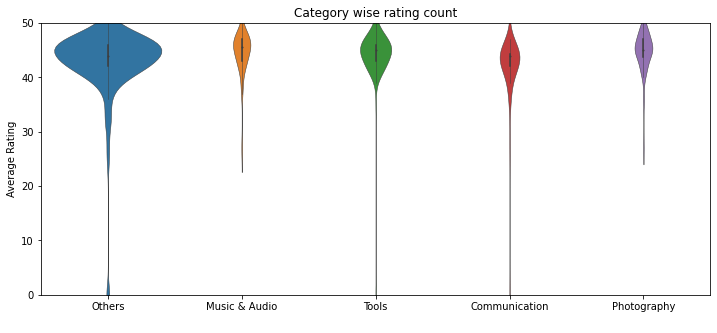

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,5))
plt.style.use('fast')
plt.ylim([0,50])

plt.title('Category wise rating count')

sns.violinplot(data=df_fin, y ='Agg_Ratings', x='broad_genre',
               vertical=True,kde=False ,linewidth=0.5,
               scale ='count',width = 0.8)

plt.xlabel(" ")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
df_fin.isnull().sum()

Title             0
Description       2
App_tags          0
Publisher_info    0
Class             0
Ratings           0
Agg_Ratings       0
installs          0
broad_genre       0
dtype: int64

In [ ]:
#Numerical columns

num_features=[col for col in df_fin.columns if df_fin[col].dtype!='O']
num_features



num_data = df_fin[num_features]
num_data.head()

,Ratings,Agg_Ratings,installs
nodeid,,,
0,667888,45,50000000
1,70273,48,1000000
2,152136,46,10000000
3,796800,45,50000000
4,2679619,46,100000000


In [ ]:
cat_features=[col for col in df_fin.columns if df_fin[col].dtype=='O']
cat_features


['Title', 'Description', 'App_tags', 'Publisher_info', 'Class', 'broad_genre']

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    print(variable, "no")

In [ ]:
for col in num_data.columns:
    has_outliers(num_data, col)



Ratings yes
Ratings no
Agg_Ratings yes
Agg_Ratings no
installs yes
installs no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


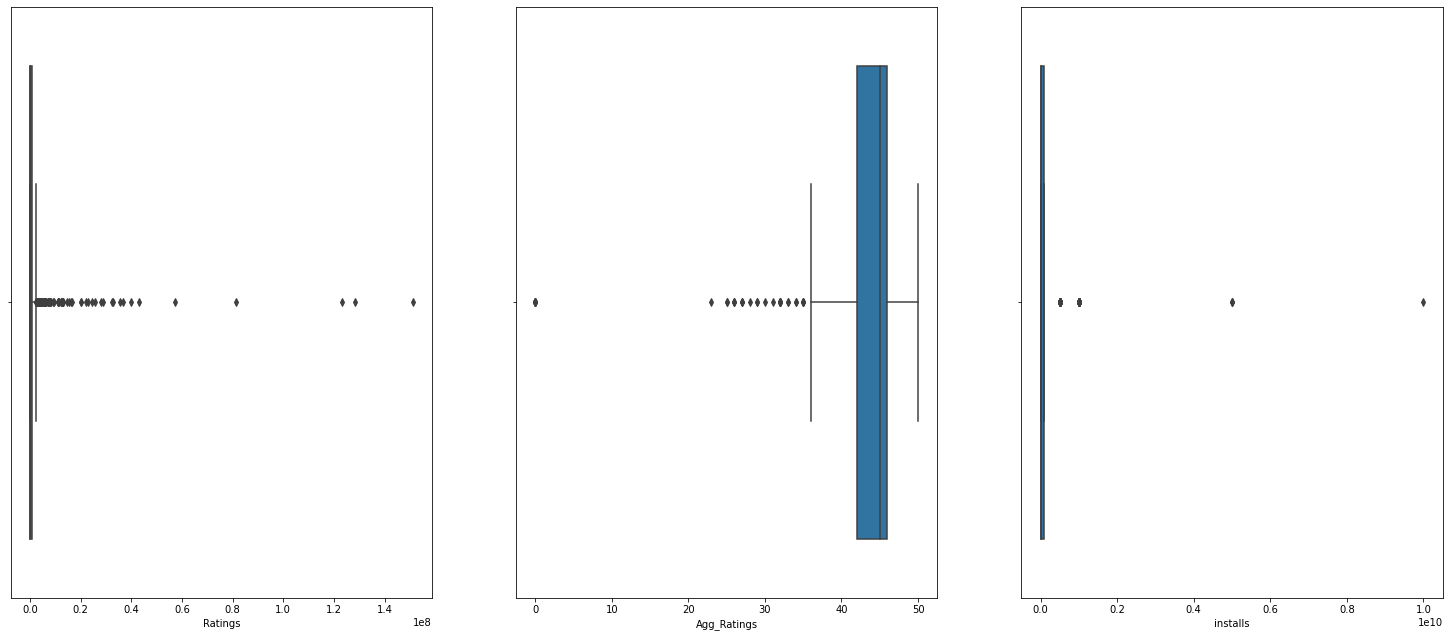

In [ ]:
plt.figure(figsize=(80,50))
for i,col in enumerate(num_data.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_data[col])

In [ ]:
df_fin['App_tags'].value_counts()

Tools                      126
Communication               80
Photography                 72
Music & Audio               70
Personalization             65
Video Players & Editors     57
Social                      52
Productivity                51
Entertainment               44
Business                    31
Action                      27
Education                    9
Lifestyle                    8
Adventure                    7
Health & Fitness             7
Arcade                       7
Libraries & Demo             7
Weather                      6
Sports                       6
Art & Design                 5
Strategy                     5
News & Magazines             5
Maps & Navigation            5
Travel & Local               4
Shopping                     4
Books & Reference            3
Finance                      3
Puzzle                       3
Racing                       3
Simulation                   2
Beauty                       1
Card                         1
Casual  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

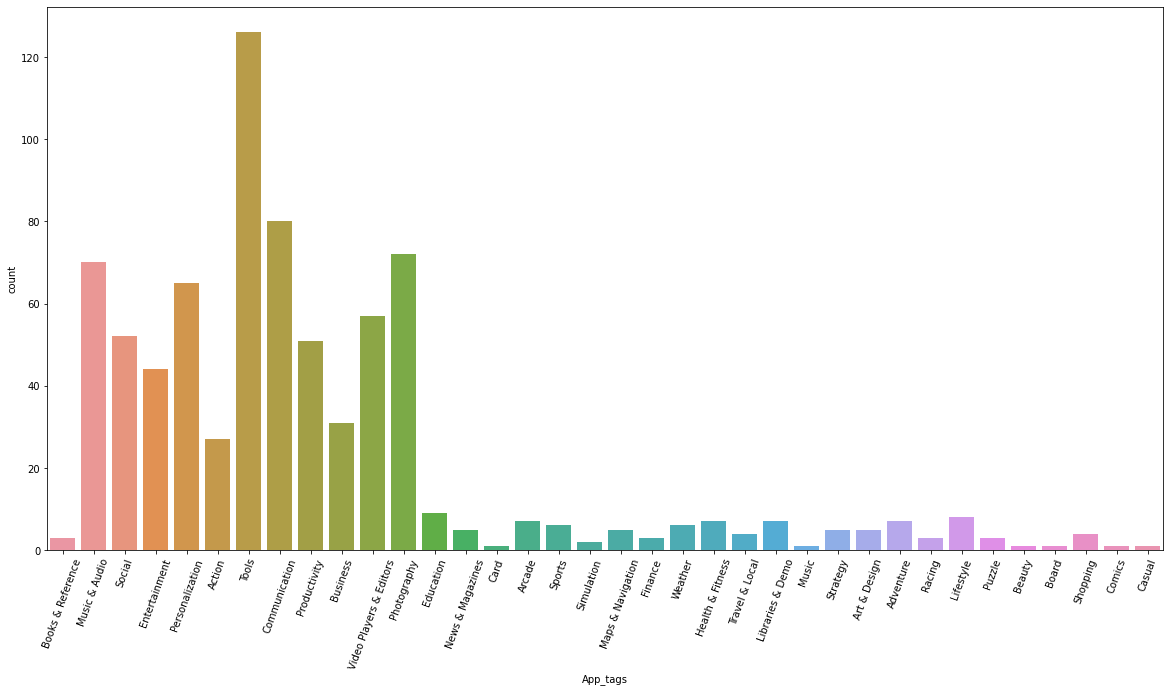

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='App_tags',data=df_fin)
plt.xticks(rotation=70)

In [ ]:
df_fin['broad_genre'].value_counts()

Others           432
Tools            126
Communication     80
Photography       72
Music & Audio     70
Name: broad_genre, dtype: int64

In [ ]:
df_fin['Class'].value_counts()

Everyone        584
Teen            169
Everyone 10+     24
Mature 17+        3
Name: Class, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

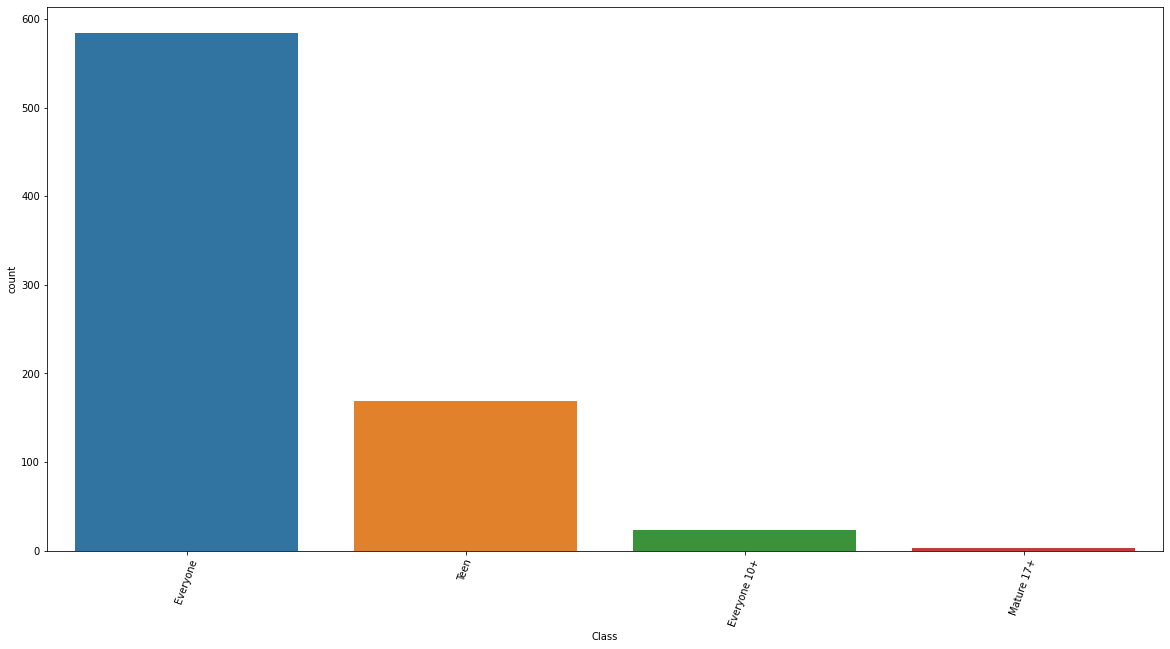

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Class',data=df_fin)
plt.xticks(rotation=70)

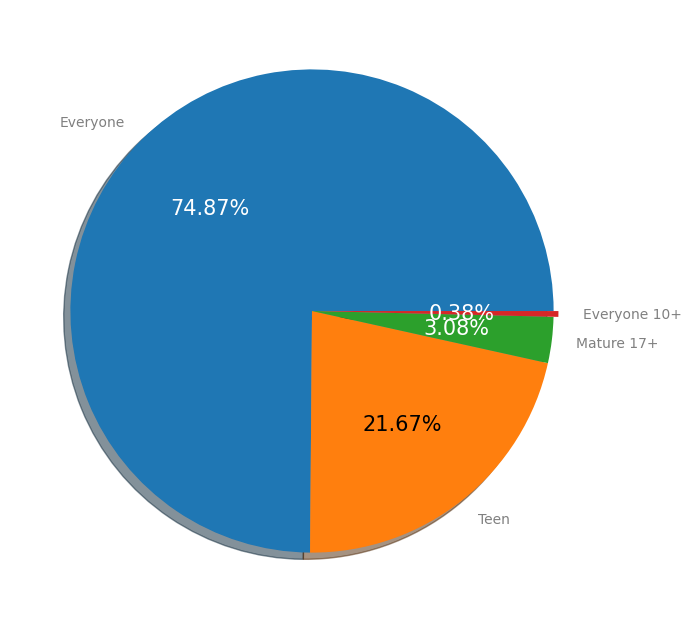

In [ ]:
# pie chart
values = df_fin['Class'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+']

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
explode = (0,0,0,.02)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Agg_ratings',x='Class',data = df_fin.sort_values('Ratings',ascending=False))
plt.xticks(rotation=90)

ValueError: ignored

<Figure size 864x576 with 0 Axes>

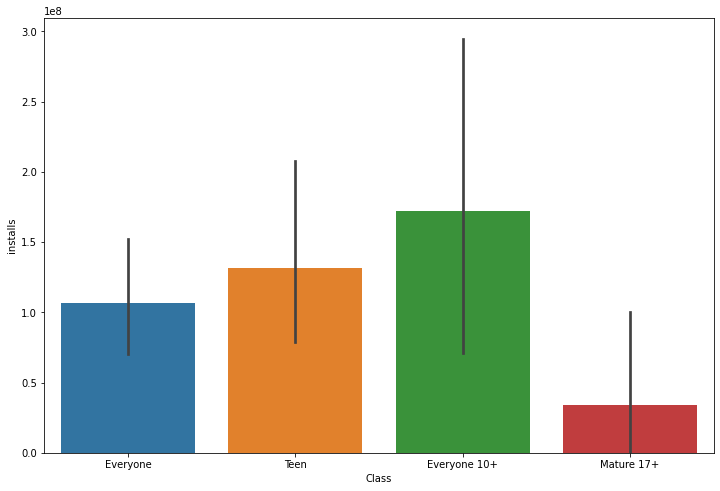

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="Class", y="installs", data=df_fin)

In [ ]:
import pandas as pd
import numpy as np
import random



path_test = "/content/drive/MyDrive/playstore/nodeFeatures1.txt"

df = pd.read_csv((path_test), sep="~|~", names=['nodeid','title','description','publisher','App Class','user_group','No_of_ratings','Total_installs'])

df['title'] = df['title'].str.replace(r"[\"\',]", '')
df['No_of_ratings'] = df['No_of_ratings'].str.replace(r"[\"\',]", '')
df['user_group'] = df['user_group'].str.replace(r"[\"\',]", '')

df['Total_installs'] = df['Total_installs'].str.replace('\W', '')

#print(df['Total_installs'].where(df['Total_installs'] == 'Everyone'))
#df['Total_installs'] = df['Total_installs'].astype(np.int64)

valnew = df.loc[df['Total_installs'].str.contains("Everyone",na=False ,case=False)]

valnew1 = df.loc[df['Total_installs'].str.contains("Personalization",na=False ,case=False)]

valnew2 = df.loc[df['Total_installs'].str.contains("Varieswithdevice",na=False ,case=False)]

valnew3 = df.loc[df['Total_installs'].str.contains("AshAquaVision",na=False ,case=False)]


print(valnew,valnew1,valnew2,valnew3)


val = df["Total_installs"].isna().sum()
valnew
i = df["Total_installs"].unique()
i


valnew2
df.at[55,'Total_installs']= 100000
df.at[581,'Total_installs']= 100000
df.at[697,'Total_installs']= 100000
df.at[234,'Total_installs']= 100000

df.iloc[[55,581,234,697]]

df['Total_installs'] = df['Total_installs'].replace(np.nan, 0)
df['No_of_ratings'] = df['No_of_ratings'].replace(np.nan, 0)
df['Total_installs'] = df['Total_installs'].astype(np.int64)


valnew3 = df.loc[df['No_of_ratings'].str.contains("WhatsApp",na=False ,case=False)]
valnew3 = df.loc[df['No_of_ratings'].str.contains("Everyone",na=False ,case=False)]


df['No_of_ratings'].unique()
valnew3

df.at[697,'No_of_ratings']= 289881
#df.at[234,'No_of_ratings']= 783667
#df.at[234,'No_of_ratings']= 783667
#df.at[234,'No_of_ratings']= 783667



df.at[146,'user_group']= "Everyone"
df.at[252,'user_group']= "Everyone"
df.at[603,'user_group']= "Everyone"
df.at[681,'user_group']= "Everyone"

df.at[146,'No_of_ratings']= random.randint(2000, 100000)
df.at[252,'No_of_ratings']= random.randint(20000, 100000)
df.at[603,'No_of_ratings']= random.randint(30000, 100000)
df.at[681,'No_of_ratings']= random.randint(40000, 100000)

df = df.drop([146, 253, 603,681,55,234])
df['No_of_ratings'] = df['No_of_ratings'].astype(np.int64)
valnew3

df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


ParserError: ignored